In [1]:
# Library for data manipulation and analysis that can handle structured data of different data types and time series.
import pandas as pd  

# Library for numerical computing and fast matrix manipulation in Python.
import numpy as np  

# Library for creating static and interactive visualizations in Python.
import matplotlib.pyplot as plt  

# Library based on matplotlib that provides additional features for creating visualizations.
import seaborn as sns  

# Library for statistical analysis and time series analysis and modeling.
from statsmodels.graphics.tsaplots import plot_acf  

# Library for fitting and evaluating different classic machine learning models and data preprocessing.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit  
from sklearn.linear_model import Ridge  
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.multioutput import MultiOutputRegressor  
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error  

# Library for deep learning modeling and neural networks.
from tensorflow.keras import Sequential, Input  
from tensorflow.keras.layers import Dense 

C:\Users\ge68bal\AppData\Roaming\Python\Python311\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
LV_PICKLE = "https://zenodo.org/record/4549296/files/reduced_dataset.pk?download=1"
reduced_data = pd.read_pickle(LV_PICKLE)
reduced_data.head()

,0307a3cec15787560b7d0ba094f74d1decb2fa72,0f415416ff153479d65f54df3fa9974af46e3a89,1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f,27fbb11689277a30f5db9c71b42e1d3826bd34ff,2ce3e7e1a5365dc54c7f4fc6284f0052397702b9,2d837275047e5fdce39fda42b541dbf6c858a4d1,350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3,39f06481738604cb5916dce15639e380514b99ca,432650b919537d23cb4054fdb85a07eecaa4524c,49228b90116c6075fabcd8a1cf0e48e016373614,...,fe2245a4afe0afc24d215dd4abd2ffb34610dd27,all,S1,S2,S11,S12,S21,S22,ghi_backwards,temperature
2018-01-13 00:10:00+00:00,9.786000,20.518000,10.653333,19.190333,23.088333,41.712000,24.278000,12.349333,28.300333,11.307000,...,17.921333,581.757667,246.314000,335.443667,124.948000,121.366000,167.890667,167.553000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0361272897446...","[3.6288461538461543, 3.589157030333501, 3.4878..."
2018-01-13 00:20:00+00:00,11.190000,20.086333,9.367333,19.794000,22.374667,43.572667,23.853333,10.230667,30.275333,13.225333,...,16.359333,580.896333,250.185333,330.711000,126.385000,123.800333,165.354333,165.356667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9360517716272...","[3.6256410256410265, 3.5733366851013924, 3.477..."
2018-01-13 00:30:00+00:00,10.712333,19.977333,12.999333,19.607000,22.249000,39.306333,23.938667,10.445000,31.299667,11.968000,...,16.344667,579.949667,250.906000,329.043667,124.851333,126.054667,163.161000,165.882667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.3870873646209...","[3.620769230769231, 3.554524886877828, 3.46849..."
2018-01-13 00:40:00+00:00,12.445000,20.049667,11.751333,19.233333,22.755333,35.916333,24.074000,9.907000,29.984000,12.003667,...,24.532000,569.836667,247.367333,322.469333,122.151000,125.216333,167.244000,155.225333,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.076547987698...","[3.6146153846153846, 3.53470755823697, 3.45838..."
2018-01-13 00:50:00+00:00,10.487000,19.225333,10.183667,20.226667,22.375333,36.360000,25.039667,10.479667,32.333000,11.688000,...,19.819333,552.787667,246.735000,306.052667,118.858000,127.877000,169.919333,136.133333,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.691747559834...","[3.6075641025641025, 3.515870621752975, 3.4460..."


In [3]:
reduced_data.dtypes

0307a3cec15787560b7d0ba094f74d1decb2fa72    float64
0f415416ff153479d65f54df3fa9974af46e3a89    float64
1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f    float64
27fbb11689277a30f5db9c71b42e1d3826bd34ff    float64
2ce3e7e1a5365dc54c7f4fc6284f0052397702b9    float64
2d837275047e5fdce39fda42b541dbf6c858a4d1    float64
350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3    float64
39f06481738604cb5916dce15639e380514b99ca    float64
432650b919537d23cb4054fdb85a07eecaa4524c    float64
49228b90116c6075fabcd8a1cf0e48e016373614    float64
4db83178615678a918dfa6a38ae6e23de7a2d39a    float64
5e9c55269b890ad82c8ebbd146ea2a563fe768ce    float64
75d0930659fc8dcdaffed6c60d5871a969a76a87    float64
7bf877fd51c1c6db07c1fb0255eac4540030f28f    float64
7ebc4dd008e424c2510c6581a195524563b00ee9    float64
89819f031b89125c8c4b364317478f078925fe38    float64
a0ab25616dde3d31062ade71f866faa3b1e8e18f    float64
a4656735af4aa0ba2e4758f8d4f6e411cfc55097    float64
a52f9650e9aa3d60e43792eb2574e0e76bb00aaf    float64
b3e1bf5d8d03

In [4]:
reduced_data.describe()

,0307a3cec15787560b7d0ba094f74d1decb2fa72,0f415416ff153479d65f54df3fa9974af46e3a89,1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f,27fbb11689277a30f5db9c71b42e1d3826bd34ff,2ce3e7e1a5365dc54c7f4fc6284f0052397702b9,2d837275047e5fdce39fda42b541dbf6c858a4d1,350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3,39f06481738604cb5916dce15639e380514b99ca,432650b919537d23cb4054fdb85a07eecaa4524c,49228b90116c6075fabcd8a1cf0e48e016373614,...,c55a669913fe883d9ec913821688656ea8e4c884,da3ac5e45e56e0e2263f39f38c033366f5d1e0c4,fe2245a4afe0afc24d215dd4abd2ffb34610dd27,all,S1,S2,S11,S12,S21,S22
count,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,...,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000,53567.000000
mean,13.240284,22.995156,9.776394,23.409058,42.297274,42.363555,43.061240,15.992425,23.213292,22.036557,...,9.500622,16.908564,17.898915,654.890104,316.909475,337.980629,154.081720,162.827755,203.625334,134.355294
std,3.613890,9.283810,4.321372,10.983450,15.457465,9.450393,22.673602,4.955729,10.423126,7.713438,...,3.097071,5.711766,5.125619,140.720468,77.457621,72.814489,36.695086,43.436695,43.601004,33.381937
min,2.569000,5.537333,-2.524667,4.218333,15.521667,19.019000,12.510667,6.547667,0.899667,5.951333,...,0.394667,5.026333,0.000000,282.575000,143.915333,138.659667,75.820000,68.095333,85.056333,43.890000
25%,10.508333,16.032333,6.351000,14.176333,29.564333,34.611333,24.798000,12.239833,14.003833,16.296167,...,7.274000,12.531000,14.356000,543.044833,251.416333,286.825000,121.093167,127.693833,170.937667,110.125167
50%,12.560000,21.045667,9.552333,22.129333,40.218000,41.124000,31.520667,15.926333,22.098000,20.555667,...,9.145000,16.247000,17.379667,657.211333,307.865667,333.046000,152.192667,157.856667,202.199333,131.389000
75%,15.476667,28.664167,12.760500,30.224333,52.982167,49.340667,61.612333,19.082333,31.093000,26.595833,...,11.377500,20.765667,20.851833,748.181667,377.447167,387.094000,184.287500,194.403667,232.382833,157.775667
max,28.987667,62.989667,26.642333,71.555333,101.684667,76.961667,114.058667,40.236333,61.332000,70.762000,...,25.785667,41.284667,42.803000,1134.282000,541.160333,605.899000,269.400000,303.424667,369.139667,248.714000


In [5]:
reduced_data.index

DatetimeIndex(['2018-01-13 00:10:00+00:00', '2018-01-13 00:20:00+00:00',
               '2018-01-13 00:30:00+00:00', '2018-01-13 00:40:00+00:00',
               '2018-01-13 00:50:00+00:00', '2018-01-13 01:00:00+00:00',
               '2018-01-13 01:10:00+00:00', '2018-01-13 01:20:00+00:00',
               '2018-01-13 01:30:00+00:00', '2018-01-13 01:40:00+00:00',
               ...
               '2019-01-19 22:20:00+00:00', '2019-01-19 22:30:00+00:00',
               '2019-01-19 22:40:00+00:00', '2019-01-19 22:50:00+00:00',
               '2019-01-19 23:00:00+00:00', '2019-01-19 23:10:00+00:00',
               '2019-01-19 23:20:00+00:00', '2019-01-19 23:30:00+00:00',
               '2019-01-19 23:40:00+00:00', '2019-01-19 23:50:00+00:00'],
              dtype='datetime64[ns, UTC]', length=53567, freq=None)

In [6]:
load = reduced_data["S12"].to_frame().resample("1H").mean()
nwp = reduced_data.temperature.resample("1H").first().apply(pd.Series)
nwp.columns = [f"temp_{c}" for c in nwp.columns]

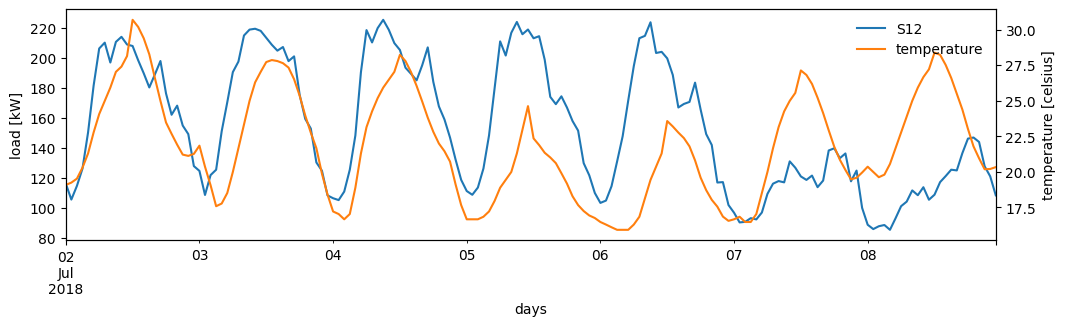

In [7]:
# create the figure with two axes
fig, ax = plt.subplots()
ax2 = ax.twinx()

# plot the data
ax = load["2018-07-02":"2018-07-08"].plot(ax=ax, figsize=(12,3),label='load', legend=False)
nwp["2018-07-02":"2018-07-08"].iloc[:,0].plot(ax=ax2, color="C1",label='temperature', legend=False)

# create legend and axes labels
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles=handles+handles2, labels=labels+labels2, loc='upper right', frameon=False)
ax2.set_ylabel('temperature [celsius]')
ax.set_ylabel('load [kW]')
ax.set_xlabel('days');

We can see some correlation between the two series, but the regular pattern may also indicate autocorrelation (for more on autocorrelation see <a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_3#Sec5">section 3.5</a> and <a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_6#Sec7">section 6.2</a>). Let's explore these relationships further:

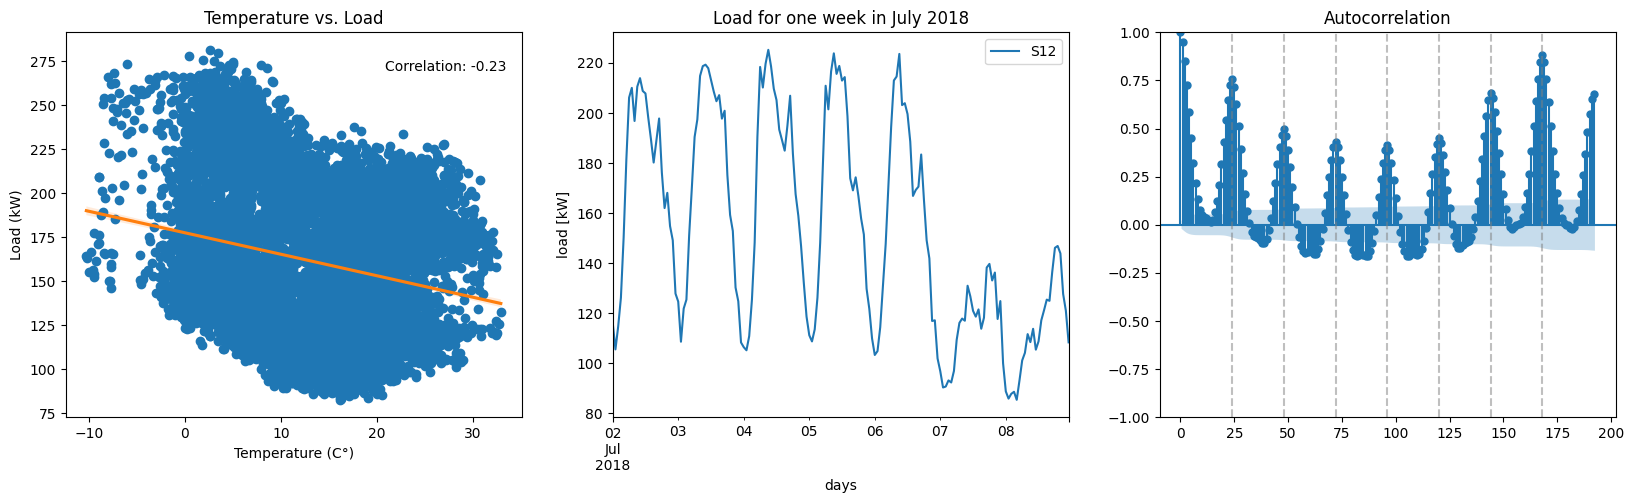

In [8]:
# create 3 subplots next to each other
fig, ax = plt.subplots(1,3, figsize=(20,5));

# linear regression line
sns.regplot(x=nwp.iloc[:,0], y=load, ax=ax[0], scatter=False, color="C1")
# create scatter plot for the first figure and make linear regression line visible
ax[0].scatter(nwp.iloc[:,0], load)
ax[0].set_xlabel("Temperature (C°)")
ax[0].set_ylabel("Load (kW)")
ax[0].set_title("Temperature vs. Load")
# compute the correlation coefficient
corr = np.corrcoef(nwp.iloc[:,0], load.iloc[:,0])[0,1]
ax[0].text(0.7, 0.9, f"Correlation: {corr:.2f}", transform=ax[0].transAxes)
# compute R^2 coefficient

# create a weekly plot for the second figure
load["2018-07-02":"2018-07-08"].plot(ax=ax[1])
# x-axis label and title
ax[1].set_xlabel("days")
ax[1].set_ylabel("load [kW]")
ax[1].set_title("Load for one week in July 2018")


# create a autocorrelation plot for the third figure
acf_fig = plot_acf(load, ax=ax[2], lags=8*24)
# plot each 24 hours a vertical line
for i in range(1,8):
    ax[2].axvline(i*24, color="grey", linestyle="--", alpha=0.5)

This basic EDA for load data shows that there is
- a correlation with weather information which can be exploited (but which could be related by the confounding variable of time of day! See [Chapter 13.6](https://link.springer.com/chapter/10.1007/978-3-031-27852-5_13#Sec6) for such pitfalls),
- a seasonal component of the daily and weekly patterns that should be modelled,
- autocorrelation at multiple lags, which should be taken into account.

# Load Forecasting Features <a name="features"></a>

As discussed in (<a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_6#Sec7">Chapter 6.2</a>) there are many different things one can *generally* do. Generally in time series forecasting there are the following options:
* Add "lagged", i.e. prior, values of your target **y** (or other variables) to model autoregressive effects (use autocorrelation plots to figure out which ones are important!), 
* Add date time features (e.g. the day of the week, month of the year, if it is a holiday yes/no, the hour of day) to model seasonal effects, 
* Moving window statistics (e.g. averages) of variables,
* Interactions of two or more variables,
* Add features of "known" external correlated time series (here: weather forecast).

While these by itself can inform machine learning models, it may be usefuly to engineer them to more elaborate features, especially for statistical models, e.g.,
* Polynomials of variables to model non-linear effects (especially for simpler models like linear regression),
* Ratios of variables,
* Utilise basis functions (<a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_6#Sec7">Chapter 6.2.5</a>)

In load forecasting the literature the most common features are (see [1] and <a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_6#Sec7">Chapter 6.2.6</a>):
* weather-related variables (most importantly, temperature, humidity, solar irradiance)
* Daily, weekly and annual seasonality
* Lagged load
* Socioeconomic indicators (Number of residents, demographics, floor space, tariffs and other interventions, monthly energy consumption)

The following figure schematically shows how the feature matrix $X$ and the target vector $y$ could look for the problem of forecasting electric load:

| 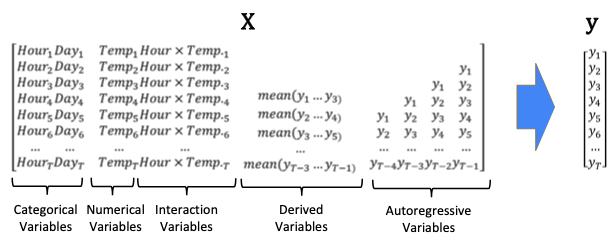 | 
|:--:| 
| *Source: Own figure.* |

(Note that creating lags leads to NaN values that need to be cut off before training models.)   

The above figure shows how one can forecast one specific point in the future (e.g., *one-step ahead* in the same resolution. Often one needs to forecast several steps ahead. This can generally be achieved using one of the following two approaches (<a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_5">Section 5.2</a>):
- a *recursive scheme*, that iteratively predicts one step at a time and uses the former iteration's forecast as input, 
- a *direct scheme*, that predicts several steps at once, either as direct output of one model or the output of several models.

The former has the advantage that it can model the dependencies between the steps in the forecast horizon. An disadvantage is that forecast errors can accumluate over the prediction horizon.


| 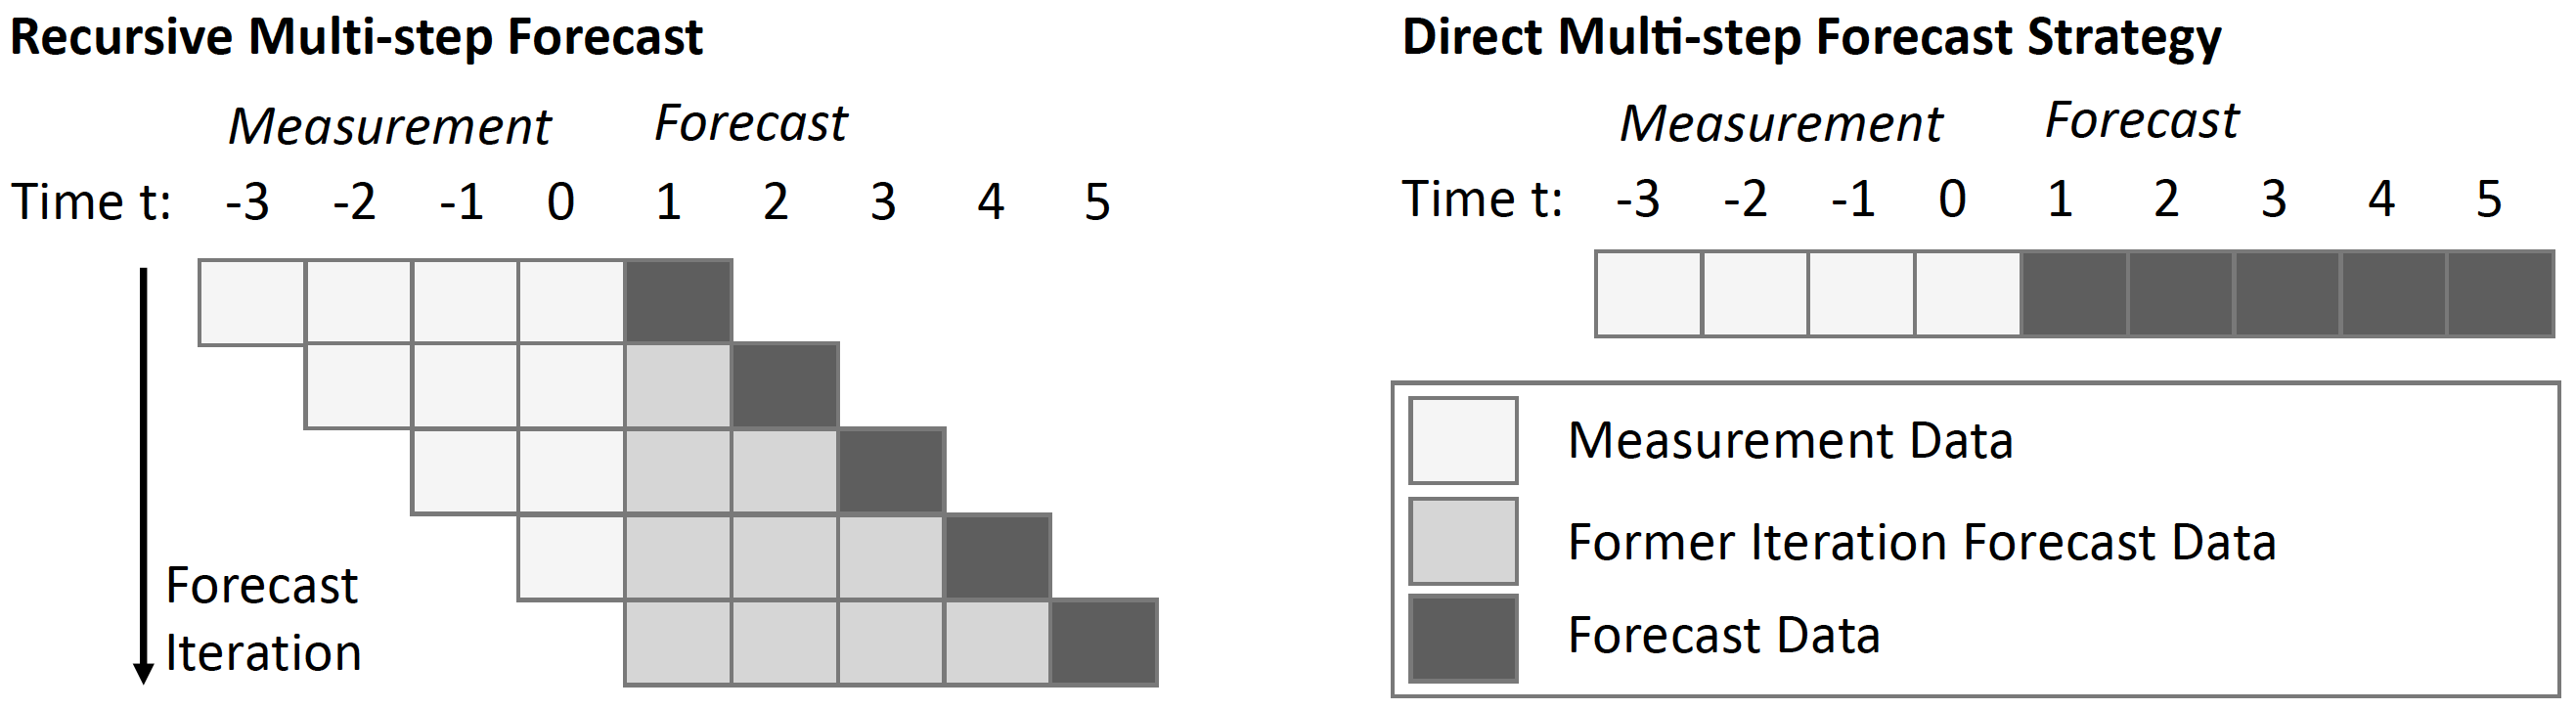 | 
|:--:| 
| *Source: Own figure.* |

## Encoding Cyclic Calendar-based Features <a name="cyclic"></a>

When encoding calendar-based variables, there are different ways to approach this:
* Encode them as numbers (e.g., January, February, … = 1, 2, ….). **Problem**: Numbers indicate "closeness", "order" and linear increasing relationship that may not be useful for all models.
* Dummy-encode/One-Hot-Encode (e.g. Monday, Tuesday, … = (1,0,0,0,0,0,0), (0,1,0,0,0,0,0), …) the variables. This is the most common approach. **Problem**: However, no information about order is preserved. For instance, January and February are somewhat similar. Also, cyclic properties are not preserved, e.g. December and January may also be considered similar.
* Model seasonal properties using Sine and Cosine functions!

As described in [this post,](https://towardsdatascience.com/forecasting-energy-consumption-using-neural-networks-xgboost-2032b6e6f7e2) (also see <a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_14#Sec2">Section 14.2</a> of the book) one can encode the seasonal properties using Sine and Cosine functions as visualised in the following figure from the post:



| <img src="https://miro.medium.com/max/1400/1*GuL5Cq_yBBKY6aqUD0jtDQ.png" alt="Encoding" style="float: left; margin-right: 10px;" />| 
|:--:| 
| *Source: [Blog Post on Towards Datascience.](https://towardsdatascience.com/forecasting-energy-consumption-using-neural-networks-xgboost-2032b6e6f7e2)* |


# Preparing the Data for Training and Testing <a name="inputoutput"></a>

We can now use Pandas and the Numpy numerical library to create features. For this tutorial, let's consider the very short-term forecasting task of predicting the load 6 hours in advance. We model the following features to use in a model for _direct_ forecasting, so that we can use whatever is available at the time the forecast is issued, such as the current forecast or historical information. 

Numerical input should be scaled, for example using standardisation or min/max scaling (here standard scaling). Categorical data should be one-hot coded (or dummy coded).

In [9]:
load = reduced_data["S12"].to_frame().resample("1H").mean()
# add sine/cosine encoding for hour of day and month of the year for the time stamp of the forecast issue time.
load["hour_x"] = np.sin(np.radians((360/24) * load.index.hour))
load["hour_y"] = np.cos(np.radians((360/24) * load.index.hour))
load["month_x"] = np.sin(np.radians((360/12) * load.index.month))
load["month_y"] = np.cos(np.radians((360/12) * load.index.month))

# we had the first six values of the forecast as well as a moving average of the last 12 hours before the issue time
load = pd.concat([load, nwp.iloc[:,:6]], axis=1)
load["temperature_rolling_mean"] = nwp.iloc[:,0].rolling(window=12).mean()

# Add lags up to one day
MAX_LAG = 24
for lag in range(MAX_LAG, 0, -1):
    load["load_lag_" + str(lag)] = load.S12.shift(lag)

scaler = MinMaxScaler()
load = pd.DataFrame(scaler.fit_transform(load), index=load.index, columns=load.columns)

# add calendar-based variables as categorical data so we can compare it against the sine/cosine encoding. It is already min/max scaled
load["day_of_week"] = load.index.weekday
load["hour_of_day"] = load.index.hour
load["month_of_year"] = load.index.month
load["weekend"] = load.index.weekday.isin([5,6])
load = pd.get_dummies(load, columns=["day_of_week", "hour_of_day", "month_of_year"])#, "weekend"])

load["2018-07-02":"2018-07-02"]

,S12,hour_x,hour_y,month_x,month_y,temp_0,temp_1,temp_2,temp_3,temp_4,...,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,month_of_year_12
2018-07-02 00:00:00+00:00,0.168788,0.500000,1.000000,0.25,0.066987,0.679861,0.676396,0.675892,0.688731,0.709506,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 01:00:00+00:00,0.115096,0.629410,0.982963,0.25,0.066987,0.683565,0.682832,0.693504,0.711635,0.743655,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 02:00:00+00:00,0.160860,0.750000,0.933013,0.25,0.066987,0.690046,0.700529,0.716377,0.745534,0.773419,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 03:00:00+00:00,0.218705,0.853553,0.853553,0.25,0.066987,0.707870,0.723512,0.750229,0.775080,0.794878,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 04:00:00+00:00,0.339480,0.933013,0.750000,0.25,0.066987,0.731019,0.757527,0.779735,0.796381,0.816336,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 05:00:00+00:00,0.496555,0.982963,0.629410,0.25,0.066987,0.765278,0.787175,0.801006,0.817682,0.841947,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 06:00:00+00:00,0.620691,1.000000,0.500000,0.25,0.066987,0.795139,0.808550,0.822278,0.843106,0.850485,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 07:00:00+00:00,0.640260,0.982963,0.370590,0.25,0.066987,0.816667,0.829924,0.847667,0.851580,0.867559,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 08:00:00+00:00,0.573769,0.933013,0.250000,0.25,0.066987,0.838194,0.855436,0.856130,0.868530,0.870789,...,0,0,0,0,1,0,0,0,0,0
2018-07-02 09:00:00+00:00,0.642775,0.853553,0.146447,0.25,0.066987,0.863889,0.863939,0.873056,0.871736,0.880480,...,0,0,0,0,1,0,0,0,0,0


In [10]:
load.columns

Index(['S12', 'hour_x', 'hour_y', 'month_x', 'month_y', 'temp_0', 'temp_1',
       'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temperature_rolling_mean',
       'load_lag_24', 'load_lag_23', 'load_lag_22', 'load_lag_21',
       'load_lag_20', 'load_lag_19', 'load_lag_18', 'load_lag_17',
       'load_lag_16', 'load_lag_15', 'load_lag_14', 'load_lag_13',
       'load_lag_12', 'load_lag_11', 'load_lag_10', 'load_lag_9', 'load_lag_8',
       'load_lag_7', 'load_lag_6', 'load_lag_5', 'load_lag_4', 'load_lag_3',
       'load_lag_2', 'load_lag_1', 'weekend', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'hour_of_day_0', 'hour_of_day_1', 'hour_of_day_2',
       'hour_of_day_3', 'hour_of_day_4', 'hour_of_day_5', 'hour_of_day_6',
       'hour_of_day_7', 'hour_of_day_8', 'hour_of_day_9', 'hour_of_day_10',
       'hour_of_day_11', 'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14',
       'hour_of_day_15', 'hour_

Note, that generally there are different ways that one can use to preprocess data. Here we use standard scaling, but you may also try Min-/Max-Scaling, Logarithmic Transforms or Box-Cox-Transforms, depending on the models used. See <a href="https://link.springer.com/chapter/10.1007/978-3-031-27852-5_6#Sec2">Section 6.1.3</a>.

Now we prepare the target and drop it from the feature data. Here we follow the *direct* forecasting scheme. The target is prepared for multi-output regression models in the form (n samples, H), where H is the forecast horizon in hours. Of course, feel free to code an iterative scheme!

In [11]:
H = 6
target = pd.DataFrame(index = load.index)
for h in range( 6):
    target["target_" + str(h)] = load.S12.shift(-h)
load = load.drop("S12", axis=1)

target["2018-07-02":"2018-07-02"]

,target_0,target_1,target_2,target_3,target_4,target_5
2018-07-02 00:00:00+00:00,0.168788,0.115096,0.160860,0.218705,0.339480,0.496555
2018-07-02 01:00:00+00:00,0.115096,0.160860,0.218705,0.339480,0.496555,0.620691
2018-07-02 02:00:00+00:00,0.160860,0.218705,0.339480,0.496555,0.620691,0.640260
2018-07-02 03:00:00+00:00,0.218705,0.339480,0.496555,0.620691,0.640260,0.573769
2018-07-02 04:00:00+00:00,0.339480,0.496555,0.620691,0.640260,0.573769,0.642775
2018-07-02 05:00:00+00:00,0.496555,0.620691,0.640260,0.573769,0.642775,0.659763
2018-07-02 06:00:00+00:00,0.620691,0.640260,0.573769,0.642775,0.659763,0.634032
2018-07-02 07:00:00+00:00,0.640260,0.573769,0.642775,0.659763,0.634032,0.629040
2018-07-02 08:00:00+00:00,0.573769,0.642775,0.659763,0.634032,0.629040,0.581286
2018-07-02 09:00:00+00:00,0.642775,0.659763,0.634032,0.629040,0.581286,0.537632


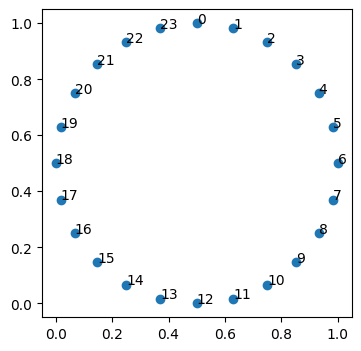

In [12]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))
ax.scatter(load["hour_x"].iloc[:24], load["hour_y"].iloc[:24])
for h in range(24):
    ax.annotate(load.index.hour[h], (load["hour_x"].iloc[h], load["hour_y"].iloc[h]))

We have now generated 80 candidate features from our initial columns, which we hope will provide the model with richer predictive information! But with different encodings, there is still redundancy and highly collinear variables (see [Chapter 13.6](https://link.springer.com/chapter/10.1007/978-3-031-27852-5_13#Sec6)). So let's define a feature set for our first models:

In [13]:
HOUR_MONTH = ['hour_x', 'hour_y', 'month_x', 'month_y']
DOW = ['day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6']
NWP = ['temp_0', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temperature_rolling_mean']
LAGGED_LOAD = ['load_lag_24', 'load_lag_23', 'load_lag_22', 'load_lag_21',
       		'load_lag_20', 'load_lag_19', 'load_lag_18', 'load_lag_17',
       		'load_lag_16', 'load_lag_15', 'load_lag_14', 'load_lag_13',
       		'load_lag_12', 'load_lag_11', 'load_lag_10', 'load_lag_9', 'load_lag_8',
       		'load_lag_7', 'load_lag_6', 'load_lag_5', 'load_lag_4', 'load_lag_3',
       		'load_lag_2', 'load_lag_1']

FEATURES = HOUR_MONTH + DOW + NWP + LAGGED_LOAD 	

The available data is split up to train and test data. Here, we use a blocked cross-validation scheme (see Section [Cross-validation for time series](#crossvalidation) of this tutorial or book [Chapter 8.1.3](https://link.springer.com/chapter/10.1007/978-3-031-27852-5_8#Sec2) for some other possible schemes).

In [14]:
X, Y = load.iloc[MAX_LAG:-H,:].loc[:,FEATURES], target.iloc[MAX_LAG:-H,:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6673, 42) (2225, 42) (6673, 6) (2225, 6)


In [15]:
y_hat_naive = Y.shift(168).loc[X_test.index]
y_hat_sma = np.divide(Y.shift(168).loc[X_test.index] + Y.shift(168*2).loc[X_test.index] + Y.shift(168*3).loc[X_test.index] + Y.shift(168*4).loc[X_test.index], 4)

In [16]:
def mape(y_true, y_pred): 
    return mean_absolute_percentage_error(y_true, y_pred) * 100

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

print(f"MAPE Naive: {mape(y_test, y_hat_naive):.2f}, SMA: {mape(y_test, y_hat_sma):.2f}")
print(f"RMSE Naive: {rmse(y_test, y_hat_naive):.4f}, SMA: {rmse(y_test, y_hat_sma):.4f}")

MAPE Naive: 19.44, SMA: 20.48
RMSE Naive: 0.1193, SMA: 0.1155


In [36]:
# Fit a KNN regression model
model = KNeighborsRegressor(n_neighbors=6, weights="distance")
model.fit(X_train, y_train)

y_hat_knn = pd.DataFrame(model.predict(X_test), index=y_test.index)
print(f"RMSE SMA: {rmse(y_test, y_hat_sma):.4f}, KNN: {rmse(y_test, y_hat_knn):.4f}")

RMSE SMA: 0.1155, KNN: 0.0827


In [18]:
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor

In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
X_train

,hour_x,hour_y,month_x,month_y,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,load_lag_10,load_lag_9,load_lag_8,load_lag_7,load_lag_6,load_lag_5,load_lag_4,load_lag_3,load_lag_2,load_lag_1
2018-01-14 00:00:00+00:00,0.500000,1.000000,0.750000,0.933013,0,0,0,0,0,0,...,0.288935,0.268137,0.382289,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301
2018-01-14 01:00:00+00:00,0.629410,0.982963,0.750000,0.933013,0,0,0,0,0,0,...,0.268137,0.382289,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116
2018-01-14 02:00:00+00:00,0.750000,0.933013,0.750000,0.933013,0,0,0,0,0,0,...,0.382289,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116,0.240674
2018-01-14 03:00:00+00:00,0.853553,0.853553,0.750000,0.933013,0,0,0,0,0,0,...,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116,0.240674,0.258565
2018-01-14 04:00:00+00:00,0.933013,0.750000,0.750000,0.933013,0,0,0,0,0,0,...,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116,0.240674,0.258565,0.225509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-18 20:00:00+00:00,0.066987,0.750000,0.066987,0.750000,0,0,0,1,0,0,...,0.470108,0.451068,0.458389,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681
2018-10-18 21:00:00+00:00,0.146447,0.853553,0.066987,0.750000,0,0,0,1,0,0,...,0.451068,0.458389,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681,0.203327
2018-10-18 22:00:00+00:00,0.250000,0.933013,0.066987,0.750000,0,0,0,1,0,0,...,0.458389,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681,0.203327,0.134322
2018-10-18 23:00:00+00:00,0.370590,0.982963,0.066987,0.750000,0,0,0,1,0,0,...,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681,0.203327,0.134322,0.123734


In [39]:
from sktime.utils.data_processing import from_nested_to_3d_numpy

# suppose `tabular_data` is your original data in tabular format
# convert it to a nested DataFrame
nested_data = Xtrain.applymap(lambda cell: pd.Series(cell))

# now you can use nested_data with KNeighborsTimeSeriesRegressor

ModuleNotFoundError: No module named 'sktime.utils.data_processing'

In [21]:
kn_regressor = KNeighborsTimeSeriesRegressor()#n_neighbors=1, metric="dtw")
kn_regressor.fit(X_train, y_train)

TypeError: X is not of a supported input data type.X must be in a supported mtype format for Panel, found <class 'pandas.core.frame.DataFrame'>Use datatypes.check_is_mtype to check conformance with specifications.

In [22]:
from sktime.datasets import load_unit_test
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor
X_train1, y_train1 = load_unit_test(return_X_y=True, split="train")
X_test1, y_test1 = load_unit_test(return_X_y=True, split="test")
regressor = KNeighborsTimeSeriesRegressor()
regressor.fit(X_train1, y_train1)
KNeighborsTimeSeriesRegressor(...)
y_pred1 = regressor.predict(X_test1)

c:\Users\ge68bal\AppData\Local\miniconda3\envs\sktime_load_fc\Lib\site-packages\sktime\utils\numba\njit.py:7: UserWarning: No module named 'numba'. 'numba' is a soft dependency and not included in the base sktime installation. Please run: `pip install numba` to install the numba package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  if _check_soft_dependencies("numba", severity="warning"):


In [23]:
X_train

,hour_x,hour_y,month_x,month_y,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,load_lag_10,load_lag_9,load_lag_8,load_lag_7,load_lag_6,load_lag_5,load_lag_4,load_lag_3,load_lag_2,load_lag_1
2018-01-14 00:00:00+00:00,0.500000,1.000000,0.750000,0.933013,0,0,0,0,0,0,...,0.288935,0.268137,0.382289,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301
2018-01-14 01:00:00+00:00,0.629410,0.982963,0.750000,0.933013,0,0,0,0,0,0,...,0.268137,0.382289,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116
2018-01-14 02:00:00+00:00,0.750000,0.933013,0.750000,0.933013,0,0,0,0,0,0,...,0.382289,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116,0.240674
2018-01-14 03:00:00+00:00,0.853553,0.853553,0.750000,0.933013,0,0,0,0,0,0,...,0.438010,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116,0.240674,0.258565
2018-01-14 04:00:00+00:00,0.933013,0.750000,0.750000,0.933013,0,0,0,0,0,0,...,0.472337,0.489183,0.433037,0.366695,0.322364,0.317301,0.254116,0.240674,0.258565,0.225509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-18 20:00:00+00:00,0.066987,0.750000,0.066987,0.750000,0,0,0,1,0,0,...,0.470108,0.451068,0.458389,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681
2018-10-18 21:00:00+00:00,0.146447,0.853553,0.066987,0.750000,0,0,0,1,0,0,...,0.451068,0.458389,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681,0.203327
2018-10-18 22:00:00+00:00,0.250000,0.933013,0.066987,0.750000,0,0,0,1,0,0,...,0.458389,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681,0.203327,0.134322
2018-10-18 23:00:00+00:00,0.370590,0.982963,0.066987,0.750000,0,0,0,1,0,0,...,0.419515,0.443160,0.367840,0.406184,0.488445,0.403600,0.302681,0.203327,0.134322,0.123734


In [38]:
type(X_train1)

pandas.core.frame.DataFrame